## Calzada Jasso Andres Geovani *<span style = "color : Blue" > 23265539 </span>*

### **Practica 4** *<span style = "color : #E3182E" >Tarea de clasificación</span>*

El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado “insumergible”, se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que provocó la muerte de 1.502 de los 2.224 pasajeros y tripulantes.

Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros

<img src=https://i.blogs.es/4a9cb1/titanic/840_560.jpeg>




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score)
import statsmodels.api as sm
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.simplefilter("ignore")
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
#Cargamos nuestro DataSet y se lo asignamos a la variable df
df = pd.read_csv('full.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


Como se puede observar, nuestra varibale de clase en este caso se encuentra en la segunda posicion de nuestro DataFrame, por lo que es necesario acomodarla al final para poder tener una mejor estructura de los datos.

In [3]:
#Vamos a proceder a colocar nuestra clase al final de nuestro DataFrame 
column = df.pop('Survived')
df.insert(20, 'Survived', column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  WikiId       1304 non-null   float64
 12  Name_wiki    1304 non-null   object 
 13  Age_wiki     1302 non-null   float64
 14  Hometown     1304 non-null   object 
 15  Boarded      1304 non-null   object 
 16  Destination  1304 non-null   object 
 17  Lifeboat     502 non-null    object 
 18  Body         130 non-null    object 
 19  Class 

Algo que podemos observar es que nuestro DataFrame se encuentra con valores nulos (NAN), por lo que el siguiente paso es eliminar estos valores.

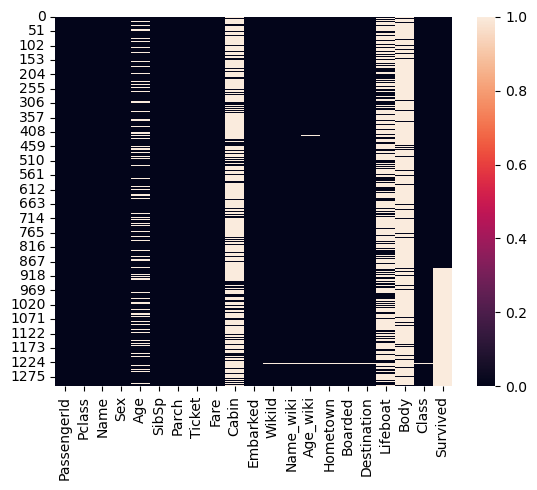

In [4]:
sns.heatmap(df.isna());

In [5]:
#Eliminamos los datos nulos 
df = df.fillna(0)

#Procedemos a ver la información y conocer si efectivamente se eliminaron estos datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  WikiId       1309 non-null   float64
 12  Name_wiki    1309 non-null   object 
 13  Age_wiki     1309 non-null   float64
 14  Hometown     1309 non-null   object 
 15  Boarded      1309 non-null   object 
 16  Destination  1309 non-null   object 
 17  Lifeboat     1309 non-null   object 
 18  Body         1309 non-null   object 
 19  Class 

#### **Observación**

Una observación con respecto a este DataFrame es que las columnas que contengan nombres en este caso para nosotros no es algo relevante
ya que no es un factor para determinar si las personas sobrevivieron o no, por lo que vamos a proceder a eliminarla 

In [6]:
#Eliminamos los atributos que tienen menos importancia por medio de la función .drop
df = df.drop(['Name', 'Ticket', 'Name_wiki','Hometown', 'Boarded', 'Destination', 'Sex','Cabin','Embarked','Lifeboat','Body'], axis = 1)


In [7]:
#Mostramos nuestro DataFrame como tipo encabezado 
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class,Survived
0,1,3,22.0,1,0,7.2500,691.0,22.0,3.0,0.0
1,2,1,38.0,1,0,71.2833,90.0,35.0,1.0,1.0
2,3,3,26.0,0,0,7.9250,865.0,26.0,3.0,1.0
3,4,1,35.0,1,0,53.1000,127.0,35.0,1.0,1.0
4,5,3,35.0,0,0,8.0500,627.0,35.0,3.0,0.0


###### *Asignamos nuestros datos de entrenamiento a la varible X_train y nuestra Variable de clase a y_train*

In [8]:
X_train = df[['PassengerId', 'Pclass', 'Age', 'SibSp','Parch','Fare','WikiId','Age_wiki','Class']]
y_train = df[['Survived']]

#### **<span style="color:Blue">Primer objetivo</span>.**

###### construir y evaluar n modelos de clasificación y comparar

#### **<span style="color:purple">Árboles de decisión</span>.**

In [9]:
clasificador1 = DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador1, X_train, y_train, cv=10)

#confusion matrix
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)


Confusion Matrix : 
 [[642 325]
 [207 135]]
Test accuracy =  0.5935828877005348
Sensitivity:  0.39473684210526316
Specificity:  0.6639089968976215


#### **<span style="color:purple">Naive Bayes</span>.**

In [11]:
clasificador2 = GaussianNB()

In [12]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador2, X_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)


Confusion Matrix : 
 [[804 163]
 [185 157]]
Test accuracy =  0.73414820473644
Sensitivity:  0.4590643274853801
Specificity:  0.8314374353671148


#### **<span style="color:purple">kNN</span>.**

In [13]:
clasificador3 = KNeighborsClassifier(3)

In [14]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador3, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)


Confusion Matrix : 
 [[560 407]
 [237 105]]
Test accuracy =  0.5080213903743316
Sensitivity:  0.30701754385964913
Specificity:  0.5791106514994829


#### **<span style="color:purple">SVM</span>.**

In [15]:
clasificador4 = SVC(kernel="linear", C=0.025, random_state=42)

In [ ]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador4, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

#### **<span style="color:purple">Análisis de Discriminante</span>.**

In [ ]:
clasificador5 = QuadraticDiscriminantAnalysis()

In [ ]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador5, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

#### **<span style="color:purple">AdaBoost</span>.**

In [ ]:
 clasificador6 = AdaBoostClassifier(random_state=42)

In [ ]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador6, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

#### **<span style="color:purple">RBF SVM</span>.**

In [ ]:
clasificador7 = SVC(gamma=2, C=1, random_state=42)

In [ ]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador7, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

#### **<span style="color:purple">Random Forest</span>.**

In [ ]:
clasificador8 = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)

In [ ]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador8, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

#### **<span style="color:purple">Neural Net</span>.**

In [ ]:
clasificador9 = MLPClassifier(alpha=1, max_iter=1000, random_state=42)

In [ ]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador9, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

#### **<span style="color:purple">Gaussian Process</span>.**

In [ ]:
clasificador10 = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)

In [ ]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador10, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

#### **<span style="color:orange">Resultados de los clasificadores</span>.**

La siguiente tabla nos muestra el resultado de evaluar los 10 clasificadores de nuestro DataFrame con los datos originales, como podemos observar los resultados no son muy favorables, pero de los clasificadores probados en este código el que nos proporciona un mejor resultado es RandomForest (resaltado con color azul).

Por lo que para sa sunfa parte usaremos RandomForest junto con reducción de dimensionalidad para observar si existen cambios favorables.


| Clasificador | Accuracy | Sensitivity |Specificity|
|----------|----------|----------|--------|
| Árbol de desición    | 0.59   | 0.39   | 0.66   |
| Naive Bayes   | 0.73   | 0.45   | 0.83  |
| KNN    | 0.50   | 0.30   | 0.57  |
|SVM     | 0.72 | 0.23 | 0.89|
|Análisis de discriminante | 0.75 | 0.37 | 0.88 |
| AdaBoost | 0.44 | 0.29 | 0.49| 
| RBF SVM | 0.73 | 0.0| 1.0|
|[Random Forest](dot.com)  | [0.76](dot.com) | [0.26](dot.com) | [0.94](dot.com)|
| Neural Net| 0.68| 0.33| 0.81|
|Gaussian Process| 0.64| 0.07| 0.84|

# **<span style="color:Red">Comparamos contra MetaApredizaje</span>.**


###### Una vez que seleccionamos nuestros clasificadores en los que obtuvimos mejores resultados previos los cuales fueron 

|Clasificador | Accuracy | Sensitivity |Specificity|
|----------|----------|----------|--------|
| Naive Bayes   | 0.73   | 0.45   | 0.83  |
|SVM     | 0.72 | 0.23 | 0.89|
|Random Forest| 0.76 | 0.26 | 0.94|

###### Dados estos resultados, los tomaremos como punto de comparación cuando realicemos Meta Aprendizaje con nuestro DataSet 

###### Imprimimos nuestro DataSet procesado 

In [ ]:
df.head()

De este DataSet vamos a proceder a separar nuestra clase y nuestro conjunto de entrenamiento. Así también vamos a proceder a mostrar para corroborar cuales son los atributos que estan en ellos.

In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X.head()

In [ ]:
y.head()

Una vez que nuestros datos estan separados y listos para ser trabajados se realizará un escalado para que úeda ser ejecutado en los modelos 

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

#### Una vez que se realiza esta parte vamos a realizar un <span style="color:Blue">Modelo Base</span> con el cual vamos a comparar nuestros resultados. 
#### Para esto vamos a hacer uso de nuestro método de validación por medio de la funcion "StratifiedShuffleSplit".
#### Así también ahora nuestros resultados lo vamos a presentar por medio de f1_score

In [ ]:
#Método de validación
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import f1_score #Conocer la precisión de nuestros modelos 

from numpy import mean #Conocer la media o promedio de los 5 conjuntos 

###### Vamos a proceder a dividir los datos en 5 conjuntos de los cuales vamos a tomar el 20 porciento para la prueba y vamos a elegir que este modelo sea determinista.

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

###### Una vez elegido nuestro modelo determinista vamos a proceder a realizar nuestro clasificador Naive Bayes para determinar nuestro modelo base

In [ ]:
clf_nb = GaussianNB()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_nb.fit(X_train, y_train)
    y_pred = clf_nb.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

In [ ]:
clf_ddt = DecisionTreeClassifier()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ddt.fit(X_train, y_train)
    y_pred = clf_ddt.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

###### En este caso podemos observar que para Naive Bayes la precisión es de 0.74 y para Árboles de Desición es de 0.74 por lo que tenemos que tratar de ganarle a Naive Bayes así como árboles de desición, <span style="color:Blue">sino el profe nos regaña</span>.

###### Para esta práctica vamos a ocupar los siguientes meta-modelos

1. Random Forest
2. Adaboost
3. Boosting
4. Baging
5. Stacking
6. Voting

###### De estos modelos se elegira el mejor para la segunda parte de la práctica 

#### <span style="color:yellow">Random Forest</span>

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=10, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

#### <span style="color:yellow">Adaboost</span>

In [ ]:
clf_ab = AdaBoostClassifier(n_estimators=5, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ab.fit(X_train, y_train)
    y_pred = clf_ab.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

#### <span style="color:yellow">Boosting</span>

In [ ]:
clf = GradientBoostingClassifier(n_estimators=10) #n_estimadores es la cantidad de los clasificadores, en este caso son 3, pero es mejor clasificarlos 
scores = cross_val_score(clf, X, y, cv=10) #No se le dice cuales son los clasificadores base 
print(scores)
print(scores.mean())

#### <span style="color:yellow">Baging</span>

In [ ]:
clf = BaggingClassifier(n_estimators=10)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print(scores.mean())

#### <span style="color:yellow">Voting</span>

In [ ]:
clf1 = DecisionTreeClassifier()
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=3)
clf4 = svm.SVC()

In [ ]:
eclf = VotingClassifier(
     estimators=[('dt', clf1), ('nb', clf2), ('kNN', clf3), ('svm', clf4)],
     voting='hard')

In [ ]:
for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['dt', 'nb', 'kNN', 'svm', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

### <span style="color:Orange">Resultados</span>

Los resultados obtenidos con los 5 meta-modelos son lo que se muestra a continuación.

|Meta-Modelos | Precision|
|------------|----------|
| Random Forest   | 0.78   |
|Adaboost     | 0.76 |
|Boosting | 0.63 |
|Baging | 0.53 |
|Voting | 0.77 | 

De los cuales podemos observar que a los Meta-Modelos que mejor les fue son los siguientes:

1. Random Forest 
2. Adaboost
3. Votign 

Para segunda parte, vamos a usar estos tres Meta-Modelos y vamos a modificar los parametros de cada función para saber si podemos mejorar el Meta-Modelo.



#### <span style="color:yellow">Random Forest</span>

Usamos Random Forest con el numero de estimadores n=10

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=10, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

Usamos Random Forest con el numero de estimadores n=50

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=50, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

Usamos Random Forest con el numero de estimadores n=100

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

Usamos Random Forest con el numero de estimadores n=500

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=500, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

#### <span style="color:Orange">Resultados con Random Forest</span>


|Meta-Modelo | Número de estimadores| Precisión|
|------------|---------------------|----------|
| Random Forest   | 10|0.78   |
| Random Forest | 50| 0.80|
| Random Forest | 100| 0.81|
| Random Forest | 500| 0.81|

De la tabla anterior podemos observar que al modificar el valor del número de estimadores en RandomForest podemos notar que nuestra precisión mejoró, ya que nuestros modelos base los cuales eran Naive Bayes y Árboles de desición ambos con un valor de precisión de 0.74. Por lo que podemos concluir que si pudimos mejorar la precisión del Meta-Modelo

#### <span style="color:yellow">Adaboost</span>

Usamos Adaboost con el numero de estimadores n=5

In [ ]:
clf_ab = AdaBoostClassifier(n_estimators=5, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ab.fit(X_train, y_train)
    y_pred = clf_ab.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

Usamos Adaboost con el numero de estimadores n=10

In [ ]:
clf_ab = AdaBoostClassifier(n_estimators=10, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ab.fit(X_train, y_train)
    y_pred = clf_ab.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

Usamos Adaboost con el numero de estimadores n=20

In [ ]:
clf_ab = AdaBoostClassifier(n_estimators=20, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ab.fit(X_train, y_train)
    y_pred = clf_ab.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

Usamos Adaboost con el numero de estimadores n=5

In [ ]:
clf_ab = AdaBoostClassifier(n_estimators=50, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ab.fit(X_train, y_train)
    y_pred = clf_ab.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

#### <span style="color:Orange">Resultados con Adaboost</span>


|Meta-Modelo | Número de estimadores| Precisión|
|------------|---------------------|----------|
| Adaboost   | 5|0.76|
| Adaboost | 10| 0.77|
| Adaboost | 20| 0.79|
| Adaboost | 50| 0.79|

De la tabla anterior podemos observar que al modificar el valor del número de estimadores en Voting podemos notar que nuestra precisión mejoró, ya que nuestros modelos base los cuales eran Naive Bayes y Árboles de desición ambos con un valor de precisión de 0.74. Por lo que podemos concluir que si pudimos mejorar la precisión del Meta-Modelo. Aunque no mejorará con respecto a RandomForest podemos notar que si mejoramos con respecto a nuestro modelos base.

#### <span style="color:yellow">Voting</span>

Usamos Voting con los clasificadores 

1. Árboles de desición
2. Naive Bayes
3. KNN
4. SVM

In [ ]:
clf1 = DecisionTreeClassifier()
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=3)
clf4 = svm.SVC()

eclf = VotingClassifier(
     estimators=[('dt', clf1), ('nb', clf2), ('kNN', clf3), ('svm', clf4)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['dt', 'nb', 'kNN', 'svm', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Usamos Voting con los clasificadores 

1. Árboles de desición
2. Árboles de desición 
3. KNN
4. SVM

In [ ]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier(n_neighbors=3)
clf4 = svm.SVC()

eclf = VotingClassifier(
     estimators=[('dt', clf1), ('nb', clf2), ('kNN', clf3), ('svm', clf4)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['dt', 'dt', 'kNN', 'svm', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Usamos Voting con los clasificadores y modificamos el clasificador de KNN con n=10

1. Árboles de desición
2. Naive Bayes
3. KNN
4. SVM

In [ ]:
clf1 = DecisionTreeClassifier()
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=10)
clf4 = svm.SVC()

eclf = VotingClassifier(
     estimators=[('dt', clf1), ('nb', clf2), ('kNN', clf3), ('svm', clf4)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['dt', 'nb', 'kNN', 'svm', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

#### <span style="color:Orange">Resultados con Voting</span>

Para el Meta-Modelo de Voting podemos observar que al modificar los clasificadores que fueron 

1. Árboles de desición
2. Naive Bayes
3. KNN
4. SVM 

Obteniendo un valor de precisión <span style="color:Blue">0.77</span>

Se realiza el cambio de estos clasificadores por:

1. Árboles de desición
2. Árboles de desición
3. KNN
4. SVM 

Obteniendo un valor de precisión  <span style="color:Blue">0.70</span>, por lo que podemos notar que al realizar esta acción de poner dos clasificadores iguales nos proporciona un menor valor en nuestra precisión.

Y el último intento que se realizó fue mantener el mismo orden que al incio solamente cambiando al valor de los estimadores. 

1. Árboles de desición
2. Naive Bayes
3. KNN  n=10
4. SVM 

Con está configuración se obtuvo una precisón de <span style="color:Blue">0.77</span>

## <span style="color:Red">Conlcusiones</span>



En esta práctica se evaluaron los Meta-Modelos en los cuales se obtuvieron mejores resultados para el primer objetivo, los cuales fueron; RandomForest, Adaboost y Voting. Al hacer uso de estos Meta-Modelos de manera "stock" se supero el modelo base sin ningun problema con los tres Meta-Modelos. 
Y para la segunda parte al optimizar los Modelos pudimos observar que se mejoro aún más el resultado de la precisón para estos Meta-Modelos. 